In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# for additional queries and visuals
import matplotlib.pyplot as plt
from matplotlib import style

# import dataframe_image
import dataframe_image as dfi

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# tables in hawaii.sqlite
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
# from sqlalchemy import extract
# 2. Write a query that filters the Measurement table to retrieve 
# the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) ==6).all()
# june_temps

In [6]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:10]

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_df


,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# exploritory analysis of June weather DF
june_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   June Temps  1700 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


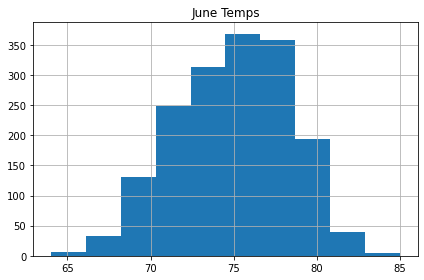

In [9]:
# create a plot (histogram)
june_df.hist()

# use savefig() to save image
plt.tight_layout()
plt.savefig('images/june_temps_hist.png')


# show the figure
plt.show()

In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_summary_stat = june_df.describe()

# export dataframe as image
dfi.export(june_temps_summary_stat, 'images/june_temps_summary_stat.png')

june_temps_summary_stat

objc[35398]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x228fe1b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x107aa9d08). One of the two will be used. Which one is undefined.
[0810/145501.481994:INFO:headless_shell.cc(660)] Written to file /var/folders/dv/ftpldl3d4gl2lk3hb5gz96b00000gn/T/tmpekhjxy5q/temp.png.


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve 
# the temperatures for the month of December.
december_temps = session.query(Measurement).filter(extract('month', Measurement.date) ==12).all()


In [12]:
# 7. Convert the December temperatures to a list.
december_temps_list = [temp.tobs for temp in december_temps]
december_temps_list[:10]

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0]

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_temps_list, columns=['December Temps'])
december_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [14]:
# exploritory analysis of December weather DF
december_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   December Temps  1517 non-null   float64
dtypes: float64(1)
memory usage: 12.0 KB


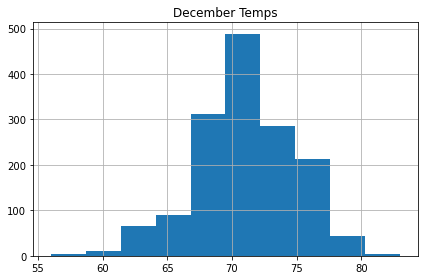

In [15]:
# create a plot (histogram)
december_df.hist()

# use savefig() to save image
plt.tight_layout()
plt.savefig('images/december_temps_hist.png')


# show the figure
plt.show()

In [16]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_summary_stat = december_df.describe()

# export dataframe as image
dfi.export(december_temps_summary_stat, 'images/december_temps_summary_stat.png')

december_temps_summary_stat

objc[35412]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x228fe1b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x10a421d08). One of the two will be used. Which one is undefined.
[0810/145502.248524:INFO:headless_shell.cc(660)] Written to file /var/folders/dv/ftpldl3d4gl2lk3hb5gz96b00000gn/T/tmpqxiov8n5/temp.png.


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries 1: Determine the Summary Statistics for September

In [17]:
# Write a query that filters the Measurement table to retrieve 
# the temperatures for the month of September.
september_temps = session.query(Measurement).filter(extract('month', Measurement.date) ==9).all()


In [18]:
# Convert the December temperatures to a list.
september_temps_list = [temp.tobs for temp in september_temps]
september_temps_list[:10]

[77.0, 76.0, 78.0, 77.0, 77.0, 77.0, 76.0, 78.0, 78.0, 78.0]

In [19]:
# Create a DataFrame from the list of temperatures for the month of September. 
september_df = pd.DataFrame(september_temps_list, columns=['September Temps'])
september_df

,September Temps
0,77.0
1,76.0
2,78.0
3,77.0
4,77.0
...,...
1475,74.0
1476,74.0
1477,77.0
1478,77.0


In [20]:
# exploritory analysis of September weather DF
september_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   September Temps  1480 non-null   float64
dtypes: float64(1)
memory usage: 11.7 KB


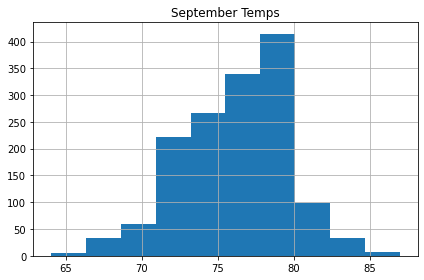

In [21]:
# create a plot (histogram)
september_df.hist()

# use savefig() to save image
plt.tight_layout()
plt.savefig('images/september_temps_hist.png')

# show the figure
plt.show()

In [22]:
# Calculate and print out the summary statistics for the September temperature DataFrame.
september_temps_summary_stat = september_df.describe()

# export dataframe as image
dfi.export(september_temps_summary_stat, 'images/september_temps_summary_stat.png')

september_temps_summary_stat

objc[35422]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x228fe1b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x105af1d08). One of the two will be used. Which one is undefined.
[0810/145503.015365:INFO:headless_shell.cc(660)] Written to file /var/folders/dv/ftpldl3d4gl2lk3hb5gz96b00000gn/T/tmpw638ujfx/temp.png.


,September Temps
count,1480.000000
mean,76.164865
std,3.535178
min,64.000000
25%,74.000000
50%,76.000000
75%,79.000000
max,87.000000


## Additional Queries 2: Determine the Summary Statistics for February

In [23]:
# Write a query that filters the Measurement table to retrieve 
# the temperatures for the month of February.
february_temps = session.query(Measurement).filter(extract('month', Measurement.date) ==2).all()


In [24]:
# Convert the December temperatures to a list.
february_temps_list = [temp.tobs for temp in february_temps]
february_temps_list[:10]

[66.0, 67.0, 69.0, 67.0, 67.0, 64.0, 69.0, 73.0, 73.0, 69.0]

In [25]:
# Create a DataFrame from the list of temperatures for the month of February. 
february_df = pd.DataFrame(february_temps_list, columns=['February Temps'])
february_df

,February Temps
0,66.0
1,67.0
2,69.0
3,67.0
4,67.0
...,...
1605,68.0
1606,66.0
1607,64.0
1608,69.0


In [26]:
# exploritory analysis of February weather DF
february_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   February Temps  1610 non-null   float64
dtypes: float64(1)
memory usage: 12.7 KB


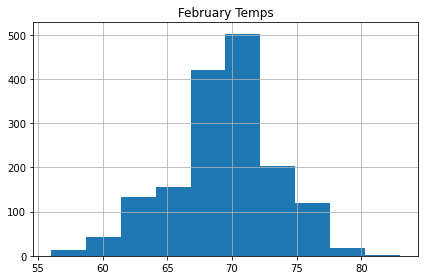

In [27]:
# create a plot (histogram)
february_df.hist()

# use savefig() to save image
plt.tight_layout()
plt.savefig('images/february_temps_hist.png')

# show the figure
plt.show()

In [28]:
# Calculate and print out the summary statistics for the February temperature DataFrame.
february_temps_summary_stat = february_df.describe()

# export dataframe as image
dfi.export(february_temps_summary_stat, 'images/february_temps_summary_stat.png')

february_temps_summary_stat

objc[35434]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x228fe1b50) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/104.0.5112.79/Libraries/libGLESv2.dylib (0x1059c9d08). One of the two will be used. Which one is undefined.
[0810/145503.798766:INFO:headless_shell.cc(660)] Written to file /var/folders/dv/ftpldl3d4gl2lk3hb5gz96b00000gn/T/tmpxqt_z0fs/temp.png.


,February Temps
count,1610.000000
mean,69.442236
std,3.981399
min,56.000000
25%,67.000000
50%,70.000000
75%,72.000000
max,83.000000
